In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,162,73,920,1100,1,0,3,4.8,314
1,6304287,Izakaya Kikufuji,162,73,1111,1200,1,0,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,162,75,1671,4000,1,0,4,4.4,270
3,6318506,Ooma,162,75,1126,1500,0,0,4,4.9,365
4,6314302,Sambo Kojin,162,75,1122,1500,1,0,4,4.8,229


In [3]:
X = df[
    ["Country Code", "City", "Cuisines", "Average Cost for two",
     "Has Table booking", "Has Online delivery", "Price range", "Votes"]
]
y = df["Aggregate rating"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state=42
)
model.fit(x_train, y_train)

,n_estimators,150
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
y_pred = model.predict(x_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0944428412153988
R^2 Score: 0.9585068897765932


In [8]:
cv_scores = cross_val_score(
    model, 
    X, 
    y, 
    cv=5,              
    scoring="r2"       
)

print("Cross-validation R² scores:", cv_scores)
print("Mean CV R² Score:", cv_scores.mean())

Cross-validation R² scores: [0.90315081 0.9397719  0.96742257 0.96189294 0.95342448]
Mean CV R² Score: 0.9451325407757649


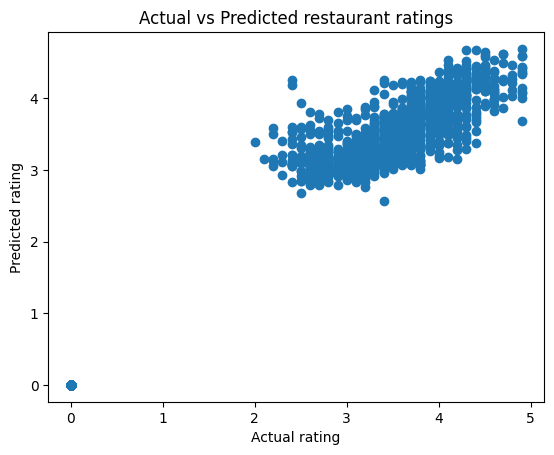

In [9]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual vs Predicted restaurant ratings")
plt.show()

In [10]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance

,Feature,Importance
7,Votes,0.973348
0,Country Code,0.008606
2,Cuisines,0.006892
1,City,0.004621
3,Average Cost for two,0.004344
5,Has Online delivery,0.000911
6,Price range,0.000862
4,Has Table booking,0.000415
